# Hand written 0 or 1 digits binary classification neural network

In [7]:
# importing modules
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import numpy as np

In [8]:
# loading hand written digits dataset
df = load_digits()
df.target.shape

(1797,)

In [9]:
# zeros numpy arrays for x and y
x = np.zeros_like(df.data)
y = np.zeros_like(df.target)

In [10]:
# getting only 0 and 1 digits data and appending them to x and y
j = 0
for i in range(len(df.data)):
    if df.target[i] == 0 or df.target[i] == 1:
        x[j] = df.data[i]
        y[j] = df.target[i]
        j += 1

In [11]:
# how many 0 and 1 in the original dataset
num = 0
for i in range(len(df.data)):
    if df.target[i] == 0 or df.target[i] == 1:
        num += 1

print(num)

360


In [12]:
# trim x and y
x = x[:360]
y = y[:360]

In [13]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [18]:
# examine how many examples and features in my dataset
x_train.shape

(288, 64)

In [19]:
# neural network model creation
model = Sequential([
    tf.keras.Input(shape=(64,)), # input layer with 64 features
    Dense(25, activation='relu', name='layer1'), # 1st ReLU hidden layer
    Dense(15, activation='relu', name='layer2'), # 2nd ReLU hidden layer
    Dense(1, activation='sigmoid', name='layer3') # sigmoid output layer for binary classification
])

2022-08-15 12:55:34.074810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-15 12:55:34.075421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-15 12:55:34.075565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-15 12:55:34.075698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-15 12:55:34.075820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [20]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                1625      
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compilong the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), # binary classification loss function
    optimizer=tf.keras.optimizers.Adam(0.001), # adam optimizer with initial 0.001 learning rate
)

In [22]:
#training the model
model.fit(
    x_train,y_train,
    epochs=10
)

Epoch 1/10
9/9 [==============================] - 1s 4ms/step - loss: 1.8682
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5370
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2892
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0960
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0322


In [23]:
# single testing data needs reshape
test = x_test[0]
test = np.reshape(test, (-1,64))
test

array([[ 0.,  0.,  7.,  5., 14., 13.,  0.,  0.,  0.,  0., 16., 15.,  6.,
         9.,  2.,  0.,  0.,  4., 16.,  7.,  0.,  4.,  4.,  0.,  0.,  6.,
        12.,  1.,  0.,  5.,  7.,  0.,  0.,  8.,  7.,  0.,  0., 12.,  3.,
         0.,  0.,  4.,  8.,  0.,  4., 12.,  0.,  0.,  0.,  2., 12.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.]])

In [24]:
# testing
model.predict(test)

1/1 [==============================] - 0s 114ms/step


array([[0.0074086]], dtype=float32)

In [25]:
# evaluating the model
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0263


0.02626696787774563

In [26]:
# applying threshold to get exact 0 or 1
def pred(x):
    p = model.predict(x)
    for i in range(len(p)):
        if p[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

3/3 [==============================] - 0s 3ms/step


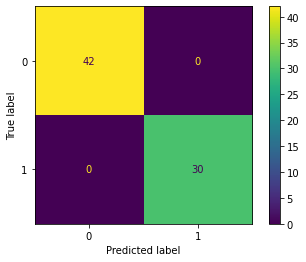

In [27]:
# confusion matrix plot
y_hat = pred(x_test)
cm = confusion_matrix(y_test, y_hat)
cm_fig = ConfusionMatrixDisplay(cm)
cm_fig.plot()